In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as mg
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#importing the data
train = pd.read_csv('black_train.csv')


In [3]:
# Describing the data
train.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [4]:
#Information about the data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [5]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [6]:
train.Age.unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [7]:
# Missing values
train.isna().sum()


User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

Since we don't have any missing values in the data apart from the product_category columns hence we can replace the null values with zero stating that they have not purchesed any product from the column which have the null values

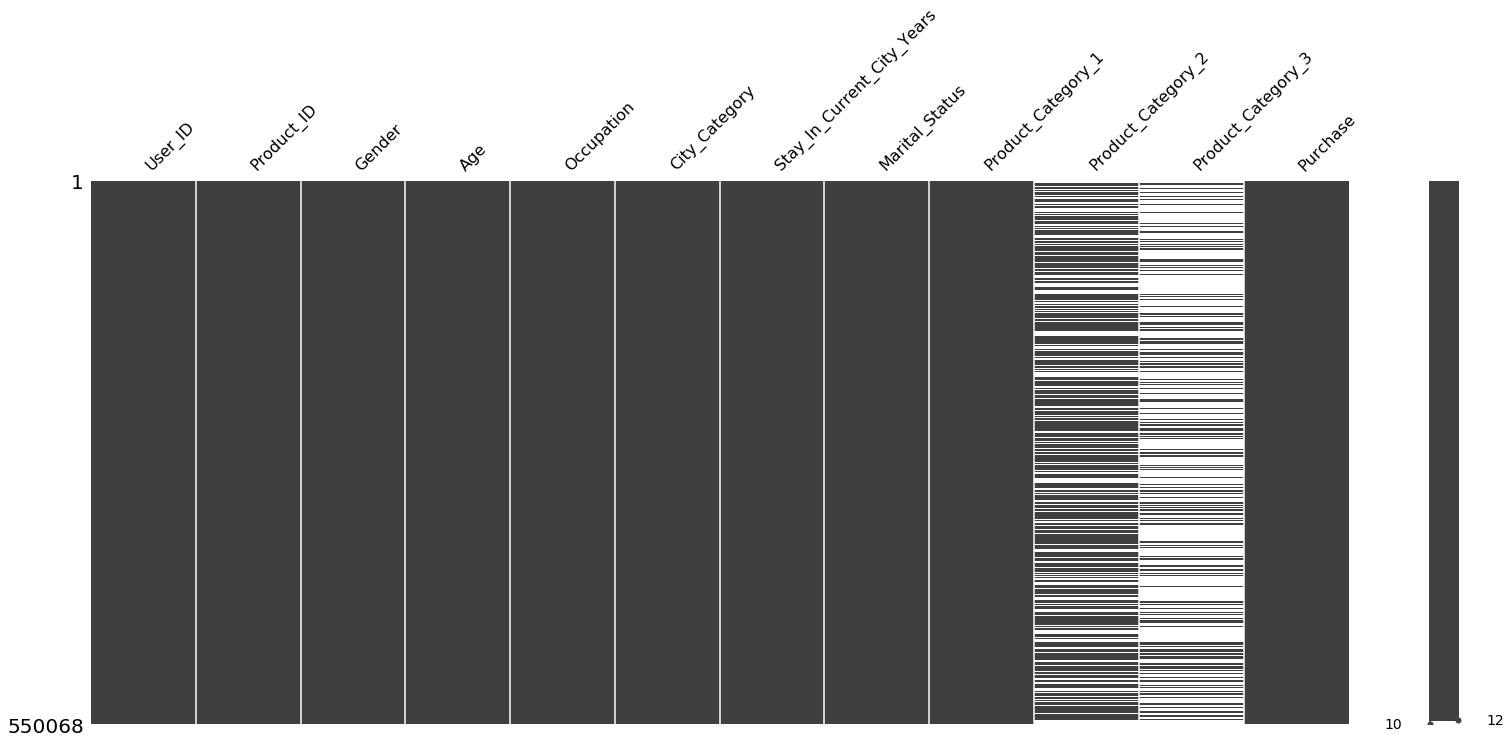

In [8]:
mg.matrix(train)

In [9]:
### Trying the pairplots using by copying the data to another name
data = train.copy()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


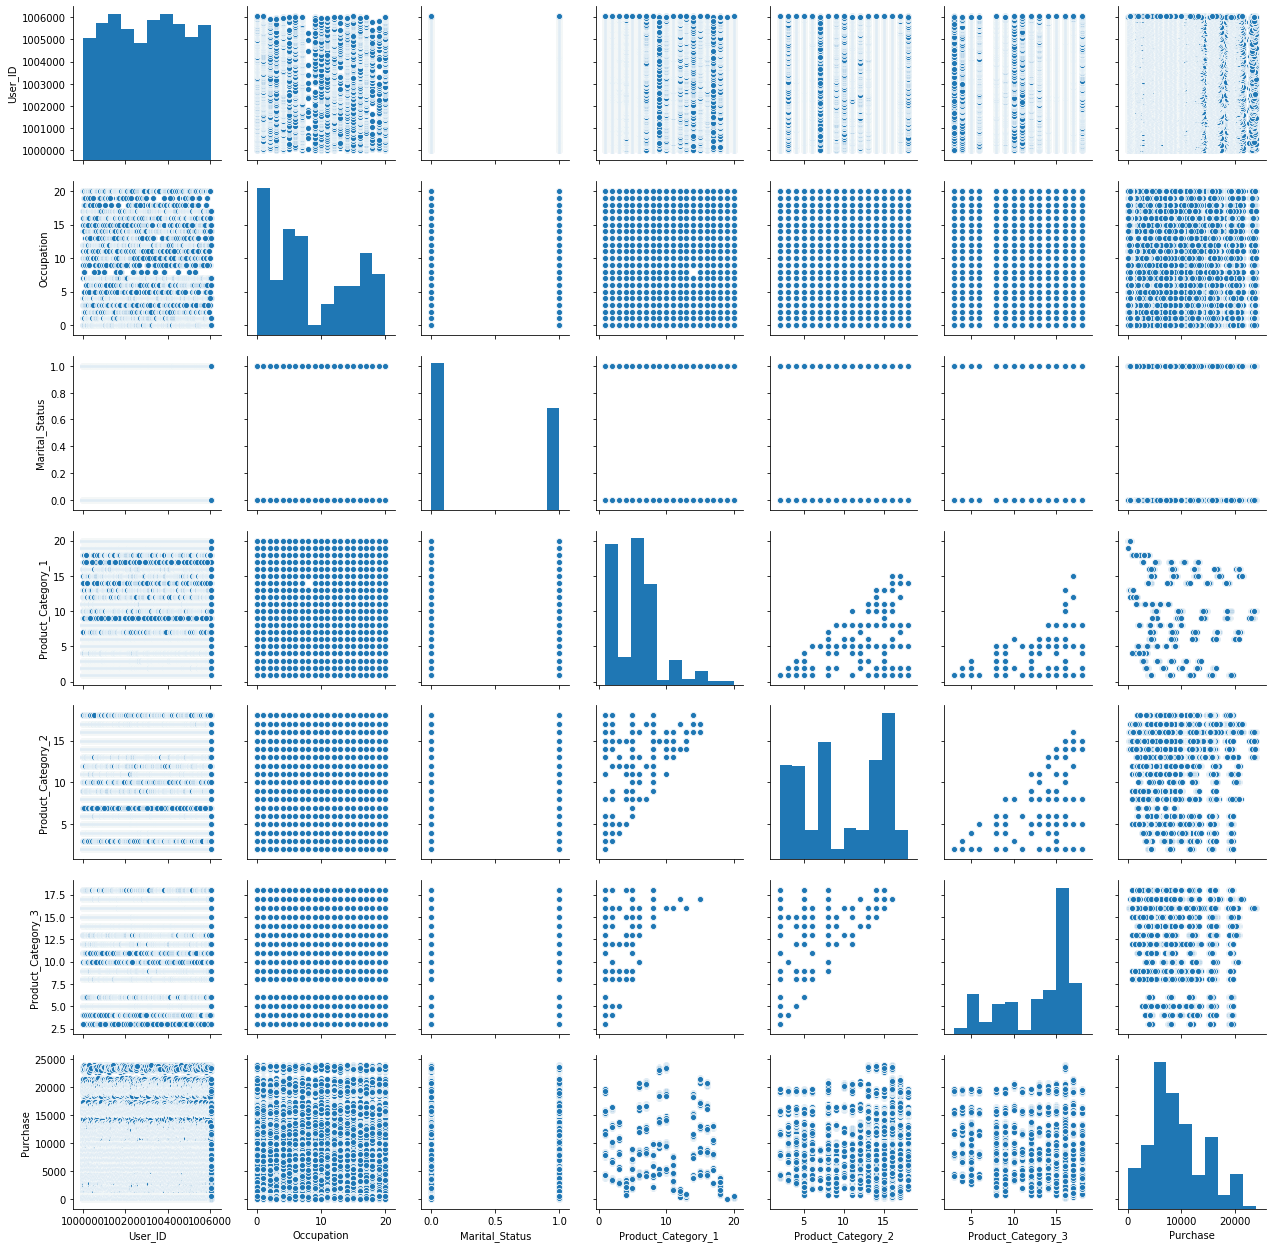

In [10]:
sns.pairplot(data)

In [11]:
# Make all the columns values to the same range in order to plot the pairplots using the seaborn
from sklearn.preprocessing import MinMaxScaler

In [12]:
# Removing the uncessary columns
data.drop(columns = ['Product_ID','User_ID'], inplace = True)

In [13]:
data.fillna(0, inplace = True)

In [18]:
# Importing the category columns
cat_data = data.select_dtypes(include= 'O')

In [16]:
from sklearn.preprocessing import OrdinalEncoder

In [17]:
oe = OrdinalEncoder()

In [20]:
cat_col_data = oe.fit_transform(cat_data)

In [21]:
cat_col_tranformed = pd.DataFrame(cat_col_data, columns= cat_data.columns)

In [23]:
data[cat_col_tranformed.columns] = cat_col_tranformed

In [29]:
data.groupby('Age').Purchase.mean()

Age
0.0    8933.464640
1.0    9169.663606
2.0    9252.690633
3.0    9331.350695
4.0    9208.625697
5.0    9534.808031
6.0    9336.280459
Name: Purchase, dtype: float64

Note: Since the relation between the purchase and Age is similar to all the Age groups. As shown in the above. Hence is no much importance is given to age Column while prediciting the Total Amount or the Purchase

In [30]:
feature_data = data.drop(columns= ['Purchase'])
target_data = data.Purchase

In [34]:
mn = MinMaxScaler()

In [35]:
new_data = mn.fit_transform(data)

In [38]:
new_data = pd.DataFrame(new_data, columns= data.columns)

In [56]:
# Graph of  Age vs Purchase 
graph_data = train.groupby('Age').Purchase.sum()
graph_data

Age
0-17      134913183
18-25     913848675
26-35    2031770578
36-45    1026569884
46-50     420843403
51-55     367099644
55+       200767375
Name: Purchase, dtype: int64

Text(0, 0.5, 'Total purchase amount')

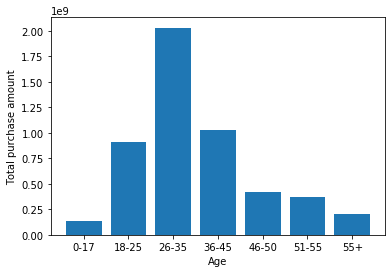

In [59]:
plt.bar(graph_data.index, graph_data.values)
plt.xlabel('Age')
plt.ylabel('Total purchase amount')

In [66]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [69]:
x = train.Age
y = train.Purchase
c = train.Marital_Status

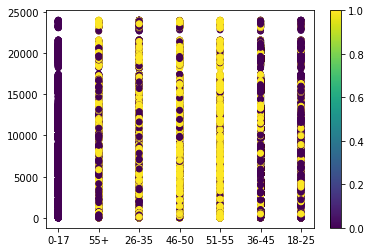

In [74]:
plt.scatter(x, y, c= c )
plt.colorbar()

### Modeling i.e Baseline model

In [83]:
from sklearn.model_selection import train_test_split

In [86]:
trainX, testX, trainY, testY = train_test_split(data.drop(columns = ['Purchase']), data.Purchase)

In [85]:
from sklearn.linear_model import LinearRegression

In [87]:
le = LinearRegression()

In [88]:
le.fit(trainX, trainY)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [89]:
predic = le.predict(testX)

In [110]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

### Linear Regression MSE and AMSE

In [123]:
mean_absolute_error(y_pred= predic, y_true= testY)

3533.087909728894

In [113]:
me = mean_squared_error(y_pred= predic, y_true= testY)
me

21481427.353449497

In [116]:
from sklearn.linear_model import Ridge, Lasso

In [117]:
ridge = Ridge(alpha = 1000)
lasso = Lasso(alpha= 1000)

In [118]:
ridge.fit(trainX, trainY)
lasso.fit(trainX, trainY)

Lasso(alpha=1000, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [120]:
ridge_pred = ridge.predict(testX)
lasso_pred = lasso.predict(testX)

### Ridge algo MSE

In [121]:
mean_squared_error(y_pred=ridge_pred, y_true= testY)

21481443.603214186

In [122]:
mean_absolute_error(y_pred=ridge_pred, y_true= testY)

3532.9958313937555

### Lasso Algo MSE, ASE

In [125]:
mean_absolute_error(y_pred= lasso_pred, y_true= testY)

3558.5999669323664

In [126]:
mean_squared_error(y_pred= lasso_pred, y_true= testY)

21670693.708296914

In [127]:
from sklearn.tree import DecisionTreeRegressor

In [128]:
de = DecisionTreeRegressor()

In [129]:
de.fit(trainX, trainY)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [130]:
de_pred = de.predict(testX)

In [131]:
mean_squared_error(y_pred= de_pred, y_true= testY)

11208839.923191944

In [132]:
mean_absolute_error(y_pred= de_pred, y_true= testY
                   )

2368.9650722697975

### Since the Decision Tree algo gives good Results we can  use the Ranndom forest with different parameter using hyperparameter tuning fot the better results


















In [133]:
from sklearn.ensemble import RandomForestRegressor

In [143]:
rf = RandomForestRegressor()

In [144]:
rf.fit(trainX, trainY)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [145]:
rf_predict = rf.predict(testX)

In [146]:
mean_absolute_error(y_pred= rf_predict, y_true= testY)

2248.6925597538925

In [147]:
mean_squared_error(y_pred= rf_predict, y_true= testY)

9571502.79847184

### Hybrid model for the above problem in order to decrease the MSE and AMSE

Using Filter & Wrapper methods

using f_classif  or f_regression choose some important features. (reduces the feature space) 100 - 75
using SequentialFeatureSelector get top features from the selected ones 75-25
Using Embedded & Wrapper methods

Lasso for identifying importnat features or decision tree.
Choosing top 50% features & applying wrapper methods

### ANOVA Univariate Test
1. Suited if feature is continues & normally distributed.
2. Target can be discrete/categorical. f_classif
3. Target can also be continues. f_regression

In [ ]:
###Step : 1 Using the F_regression function selecting the top 75% features

In [149]:
from sklearn.feature_selection import f_regression, SelectKBest

In [153]:
fs = SelectKBest(k=8,score_func= f_regression )

In [154]:
feature_data =fs.fit_transform(data.drop(columns = ['Purchase']), data.Purchase)

In [160]:
feature_data

array([[ 0.,  0., 10., ...,  3.,  0.,  0.],
       [ 0.,  0., 10., ...,  1.,  6., 14.],
       [ 0.,  0., 10., ..., 12.,  0.,  0.],
       ...,
       [ 0.,  2., 15., ..., 20.,  0.,  0.],
       [ 0.,  6.,  1., ..., 20.,  0.,  0.],
       [ 0.,  4.,  0., ..., 20.,  0.,  0.]])

In [164]:
trainx, testx, trainy, testy = train_test_split(feature_data, data.Purchase)

In [171]:
rf.fit(trainx, trainy)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [172]:
rf_predict = rf.predict(testx)

In [173]:
mean_absolute_error(y_pred= rf_predict, y_true= testy)

2252.8405837115947

In [174]:
mean_squared_error(y_pred= rf_predict, y_true= testy)

9525245.702763373

### Step 2 Since we cann't identity the column names using the Sequencialfeatureselector

In [161]:
from mlxtend.feature_selection import SequentialFeatureSelector

In [162]:
fe = SequentialFeatureSelector(k_features= 8, estimator= DecisionTreeRegressor())

### Step 3 Trying the featureselection with the top 5 features using the lasso or Decision Tree

In [176]:
de.fit(trainX, trainY)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [177]:
de.feature_importances_

array([0.01131251, 0.03247398, 0.0549514 , 0.0155245 , 0.03807597,
       0.01455554, 0.79133023, 0.02589361, 0.01588227])

In [184]:
features = list(data.drop(columns = ['Purchase']).columns)

In [185]:
fi = pd.Series(de.feature_importances_, index = features)

In [193]:
top5 = list(fi.sort_values(ascending = False)[:5].index)

In [195]:
feature_data = data[top5]

In [196]:
trainX, testX, trainY, testY = train_test_split(feature_data, data.Purchase)

In [199]:
rfe = RandomForestRegressor()

In [200]:
rfe.fit(trainX, trainY)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [201]:
rfe_pred = rfe.predict(testX)

In [202]:
mean_absolute_error(y_pred= rfe_pred, y_true= testY)

2257.5073398950353

In [204]:
mean_squared_error(y_pred= rfe_pred, y_true= testY)

9217528.84451523

### Now prediciting the Total Price for the Test Dataset

In [205]:
#importing the test dataset
test = pd.read_csv('black_test.csv')

In [206]:
test.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             72344
Product_Category_3            162562
dtype: int64

In [207]:
test.fillna(0, inplace = True)

In [209]:
data1 = test.copy()

In [210]:
data1.columns


Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3'],
      dtype='object')

In [212]:
data1.drop(columns = ['User_ID', 'Product_ID'], inplace = True)

In [213]:
test_data = data1[top5]

In [217]:
data2 = oe.fit_transform(test_data)

In [218]:
test_data = pd.DataFrame(data2, columns = test_data.columns)

In [219]:
sub_pred = rfe.predict(test_data)

In [220]:
sub_pred

array([17711.51268398, 11924.41694597,  2328.1       , ...,
        5092.7       , 13574.38333333,  9611.85029439])

###  Creating the dataFrame with columns purchase, productid, customerId

In [221]:
submit_data = pd.DataFrame(sub_pred, columns = ['Purchase'])

In [222]:
test.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3'],
      dtype='object')

In [228]:
submit_data[['User_ID', 'Product_ID']] = test[['User_ID', 'Product_ID']]

In [231]:
submit_data.set_index('Purchase', inplace = True)

In [232]:
submission_data = submit_data.to_csv()

In [233]:
file = open('balck_day.csv', 'w')
file.write(submission_data)
file.close()